#Example  

https://colab.research.google.com/drive/1T1lLepaQx7N4M24S3T-3Cl7MLlTbacr7?usp=sharing  



In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
from pytrends.request import TrendReq

In [3]:
pytrends = TrendReq(hl='en_US', tz=360)
pytrends.suggestions(keyword='bitcoin')


[{'mid': '/m/05p0rrx', 'title': 'Bitcoin', 'type': 'Currency'},
 {'mid': '/g/11gdq16zww', 'title': 'Bitcoin.com', 'type': 'Topic'},
 {'mid': '/m/0y4vk1r', 'title': 'Kraken', 'type': 'Topic'},
 {'mid': '/g/11d_wtvc5k', 'title': 'Bitcoin Cash', 'type': 'Cryptocurrency'},
 {'mid': '/m/0_lgq95', 'title': 'Bitcoin ATM', 'type': 'Topic'}]

In [4]:
kw_list = ['bitcoin']

cat = 0 # no category
geo = '' #world
timeframe = '2020-01-01 2022-10-01'



,bitcoin
geoName,
Afghanistan,0
Albania,0
Algeria,0
American Samoa,0
Andorra,0
...,...
Western Sahara,0
Yemen,0
Zambia,0


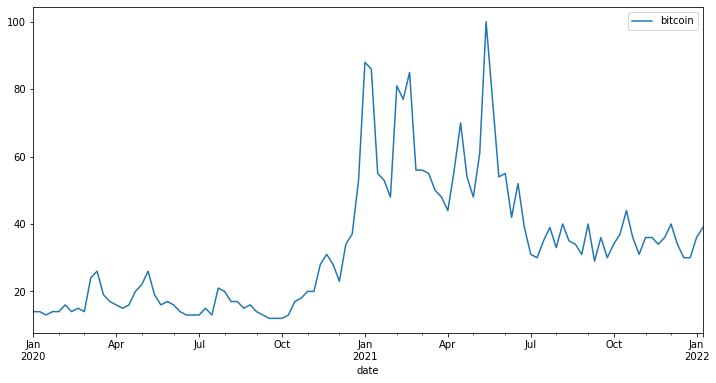

In [5]:
pytrends.build_payload(kw_list, cat= cat, timeframe= timeframe, geo= geo, gprop='' )
data = pytrends.interest_over_time()
%matplotlib inline

data.plot(figsize = (12,6))

app = pytrends.interest_by_region(resolution='COUNTRY')
app

In [6]:
data

,bitcoin,isPartial
date,,
2020-01-05,14,False
2020-01-12,14,False
2020-01-19,13,False
2020-01-26,14,False
2020-02-02,14,False
...,...,...
2021-12-12,34,False
2021-12-19,30,False
2021-12-26,30,False


In [8]:
price = yf.download('BTC-USD', start= '2020-01-01', end= '2022-10-01', interval= '1wk')

[*********************100%***********************]  1 of 1 completed


In [14]:
df_price = price['Adj Close']

In [18]:
df_price = df_price[1:]
# เอาตั้งแต่บรรทัดที่ 1 (ไม่เอา0) เพื่อให้เริ่มต้นเป็น week เดียวกับ google trends data

In [44]:
df_price 
# วันของราคา จะมากกว่า วันที่ของ google trends อยู่ 1 วัน

Date
2020-01-06     8192.494141
2020-01-13     8706.245117
2020-01-20     8596.830078
2020-01-27     9344.365234
2020-02-03    10116.673828
                  ...     
2021-12-20    50809.515625
2021-12-27    47345.218750
2022-01-03    41911.601562
2022-01-10    42735.855469
2022-01-12    43845.347656
Name: Adj Close, Length: 107, dtype: float64

In [57]:
ret = df_price.pct_change()

In [58]:
ret = ret[1:-1]
ret
# ไม่เอาบรรทัดแรก และไม่เอาบรรทัดสุดท้าย เพื่อให้เท่ากับ data ของ google trends

Date
2020-01-13    0.062710
2020-01-20   -0.012567
2020-01-27    0.086955
2020-02-03    0.082650
2020-02-10   -0.018014
                ...   
2021-12-13   -0.067693
2021-12-20    0.087835
2021-12-27   -0.068182
2022-01-03   -0.114766
2022-01-10    0.019666
Name: Adj Close, Length: 105, dtype: float64

In [63]:
data.iloc[:,:-1]

,bitcoin
date,
2020-01-05,14
2020-01-12,14
2020-01-19,13
2020-01-26,14
2020-02-02,14
...,...
2021-12-12,34
2021-12-19,30
2021-12-26,30


In [64]:
## ตั้งให้ตัวแปล X เป็น trends เพื่อพยากรณ์ ตัวแปร y ที่เป็น return ของเหรียญ
X = data.iloc[1:,:-1] # เอาตั้งแต่แถวที่ 1 ไม่เอาคอลลัมสุดท้าย
y = ret

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn import metrics

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)
### ยัดเข้า train test split

In [75]:
X_train

,bitcoin
date,
2020-01-19,13
2020-04-26,20
2021-01-31,48
2020-06-28,13
2021-11-14,36
...,...
2020-02-02,14
2020-01-26,14
2020-02-23,15


In [69]:
### ตั้ง variable
model = LinearRegression()

In [70]:
### เอา x y train เข้าสู่โมเดล 
reg = model.fit(X_train, y_train)

In [76]:
### เอาข้อมูลส่วนที่เก็บไว้ test มา predict ###
y_pred = model.predict(X_test)

In [77]:
### ดูสกอเปรียบเทียบ y_pred กับ y_test (y_test คือข้อมูลที่แบ่งไว้test)
print('Score = ', metrics.r2_score(y_test,y_pred))

Score =  -0.07324373857515787


In [78]:
m = model.coef_
b = model.intercept_

In [79]:
m

array([-0.00062116])

In [80]:
b

0.04277690254991967

In [81]:
print("MAE = ",  metrics.mean_absolute_error(y_test,y_pred))
print("MSE = ",  metrics.mean_squared_error(y_test,y_pred))
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE =  0.06646664726820448
MSE =  0.010579419262199151
RMSE =  0.10285630394972956


In [82]:
df_report = pd.DataFrame({'Actually': y_test, 'Predicted':y_pred})

In [83]:
df_report

,Actually,Predicted
Date,,
2020-03-02,-0.053062,0.034081
2020-09-21,-0.014902,0.035323
2020-11-30,0.064235,0.025384
2020-05-11,0.104416,0.026627
2020-06-08,-0.038126,0.032838
2021-10-04,0.136341,0.021657
2020-10-12,0.008712,0.034702
2021-05-31,0.005164,0.009234
2020-04-20,0.068217,0.032838


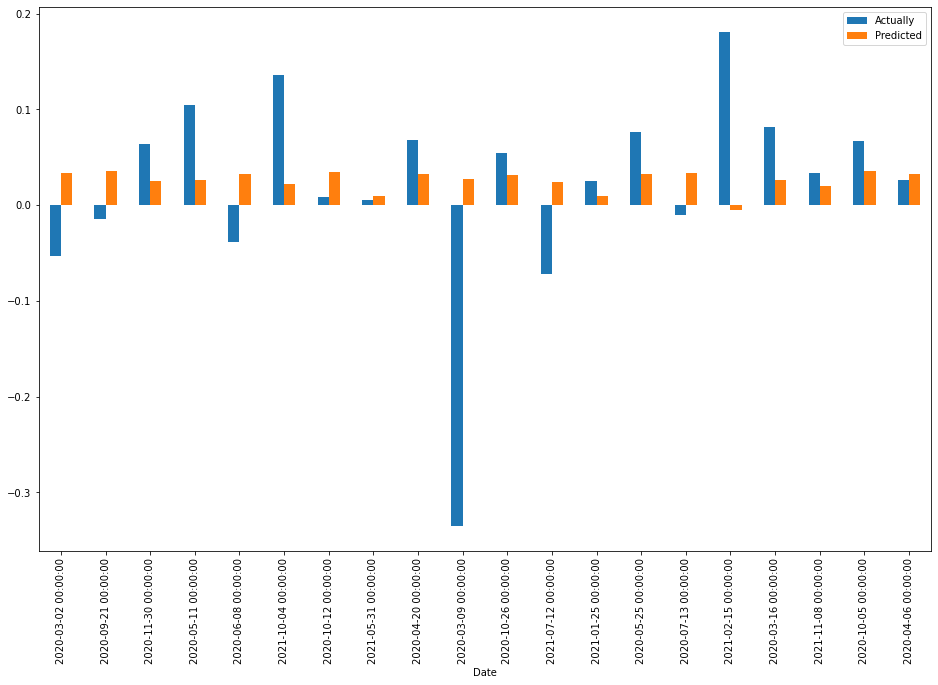

In [84]:
df1 = df_report.head(20)
df1.plot(kind="bar",figsize=(16,10))
plt.show()